In [9]:
import numpy as np
from  matplotlib import pyplot as plt
import random
import sys
from legume import PlaneWaveExp, Circle, ShapesLayer, Lattice, viz
# Recursion was limited for some reason so i increase the number
sys.setrecursionlimit(1000000000)
pi = np.pi 



FFT is useful for making grids for PWE a great way to predict band structures

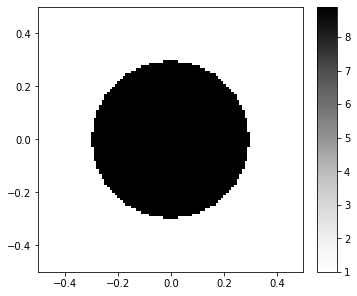

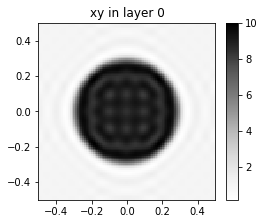

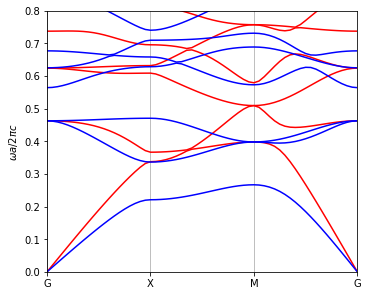

In [3]:
"Source code From Legueme https://legume.readthedocs.io/en/latest/examples/04_Guided_mode_expansion_bands_of_a_phc_slab.html"

# Define parameters as for Chapter 5, Fig. 2 from Molding the Flow of Light
ra = 0.3      # cylinder radius
eps_c = 8.9   # cylinder permittivity

# Initialize lattice
lattice = Lattice('square')
# Initialize layer
layer = ShapesLayer(lattice)
# Add a cylinder to the layer
layer.add_shape(Circle(r=ra, eps=eps_c))
# Visualize the structure
viz.eps(layer, cbar=True)
# Initialize the BZ bath as in Chapter 5, Fig. 2
path = lattice.bz_path(['G', 'X', 'M', 'G'], [20])

# Initialize the plane-wave expansion and visualize the FT of the structure
pwe = PlaneWaveExp(layer, gmax=5)
viz.eps_ft(pwe, figsize = (4, 3))


# Run the plane-wave expansion for the two separate polarizations and store the bands
pwe.run(kpoints=path['kpoints'], pol='te')
freqs_te = pwe.freqs
pwe.run(kpoints=path['kpoints'], pol='tm')
freqs_tm = pwe.freqs

# Plot the results
fig, ax = plt.subplots(1, constrained_layout=True, figsize=(5, 4))
plt.plot(freqs_te, 'r')
plt.plot(freqs_tm, 'b')
ax.set_ylim([0, 0.8])
ax.set_xlim([0, pwe.freqs.shape[0]-1])
ax.set_ylabel("$\omega a/2\pi c$")

# The `path` dict provides some useful functionality for labeling of the BZ path
plt.xticks(path['indexes'], path['labels'])
ax.xaxis.grid('True')
plt.show()

In [10]:
#Discrete Fourier Transform note this is a slow version of the algorithm but a great way to check the algorithm
def dft(X):
    N = len(X)

    som = [0] * N
    for n in range(N):
        for k in range(N):
            som[n] += X[k] * np.exp(-2.0j * pi * n * k / N)
    return som

# Our Cooley Tukey algorithm
def CT_FFT(X):

    X = np.asarray(X, dtype=float)
    N = len(X)
    if N<=1:
        return X
    Z = N//2
    
    X_even = CT_FFT(X[0:N:2])
    X_odd = CT_FFT(X[1:N:2])

    
    func = [i for i in range(N)]
    for k in range(Z):
        func[k] = X_even[k] + np.exp(-2.0j * pi * k / N) * X_odd[k]
        func[k+Z]= X_even[k] - np.exp(-2.0j * pi * k / N) * X_odd[k]
        
    return func


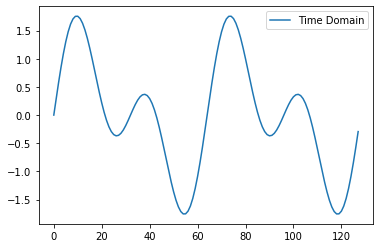

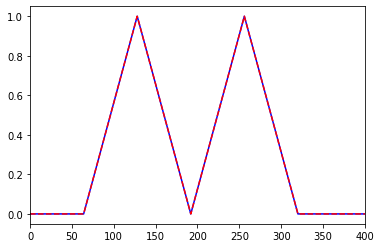

In [11]:
"Source code from https://gist.github.com/lukicdarkoo/1ab6a9a7b24025cb428a"

SAMPLE_RATE = 8192
N = 128
x_val = np.arange(0, N, 1)
x = np.sin((2*np.pi*x_val / 32.0)) + np.sin((2*np.pi*x_val / 64.0)) 

#X = cooley_tukey(x)
X = CT_FFT(x)
Y = dft(x)


## build frequencies
#powers_all = np.abs(np.divide(X, N/2))
#powers = powers_all[0:int(N/2)]
#frequencies = np.divide(np.multiply(SAMPLE_RATE, np.arange(0, N/2)), N)

## build frequencies 2
powers_all_2 = np.abs(np.divide(Y, N/2))
powers_2 = powers_all_2[0:int(N/2)]
frequencies_2 = np.divide(np.multiply(SAMPLE_RATE, np.arange(0, N/2)), N)


## Show plots
# the scales have been change to line up cycles 
plt.plot(x_val,x ,label = 'Time Domain')
plt.legend()
plt.show()
plt.plot(frequencies, powers,'blue')
plt.plot(frequencies_2, powers,'r--' )
plt.xlim(0,400)
plt.show()


Now we can look at the two domains on the same plot we can note that there are only two itterations or cycles of the x function in the time domain and there are only two peaks in the frequency domain. 